In [567]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split


import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display

In [568]:
df=pd.read_csv('/content/Absenteeism_at_work.csv')
df.isnull().any()


ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool

In [569]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [570]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,"264,604",93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,"264,604",93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,"271,219",95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"271,219",95,0,1,2,1,0,2,100,170,35,0


In [571]:
# categorical = [ 'Reason for absence','Day of the week', 'Seasons','Transportation expense']
# fig, ax = plt.subplots(2, 2, figsize=(15, 15))
# for var, subplot in zip(categorical, ax.flatten()):
#     sns.boxplot(x = var, y='Absenteeism time in hours', data = df, ax = subplot)

In [572]:
df.drop('ID', inplace=True, axis=1)
df.drop('Weight', inplace=True, axis=1)
df.drop('Height', inplace=True, axis=1)

df['Work load Average/day '] = pd.to_numeric(df['Work load Average/day '].str.replace(',',''), errors='coerce') # removing comma from values such as 100,000


In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Reason for absence               740 non-null    int64
 1   Month of absence                 740 non-null    int64
 2   Day of the week                  740 non-null    int64
 3   Seasons                          740 non-null    int64
 4   Transportation expense           740 non-null    int64
 5   Distance from Residence to Work  740 non-null    int64
 6   Service time                     740 non-null    int64
 7   Age                              740 non-null    int64
 8   Work load Average/day            740 non-null    int64
 9   Hit target                       740 non-null    int64
 10  Disciplinary failure             740 non-null    int64
 11  Education                        740 non-null    int64
 12  Son                              740 non-null    i

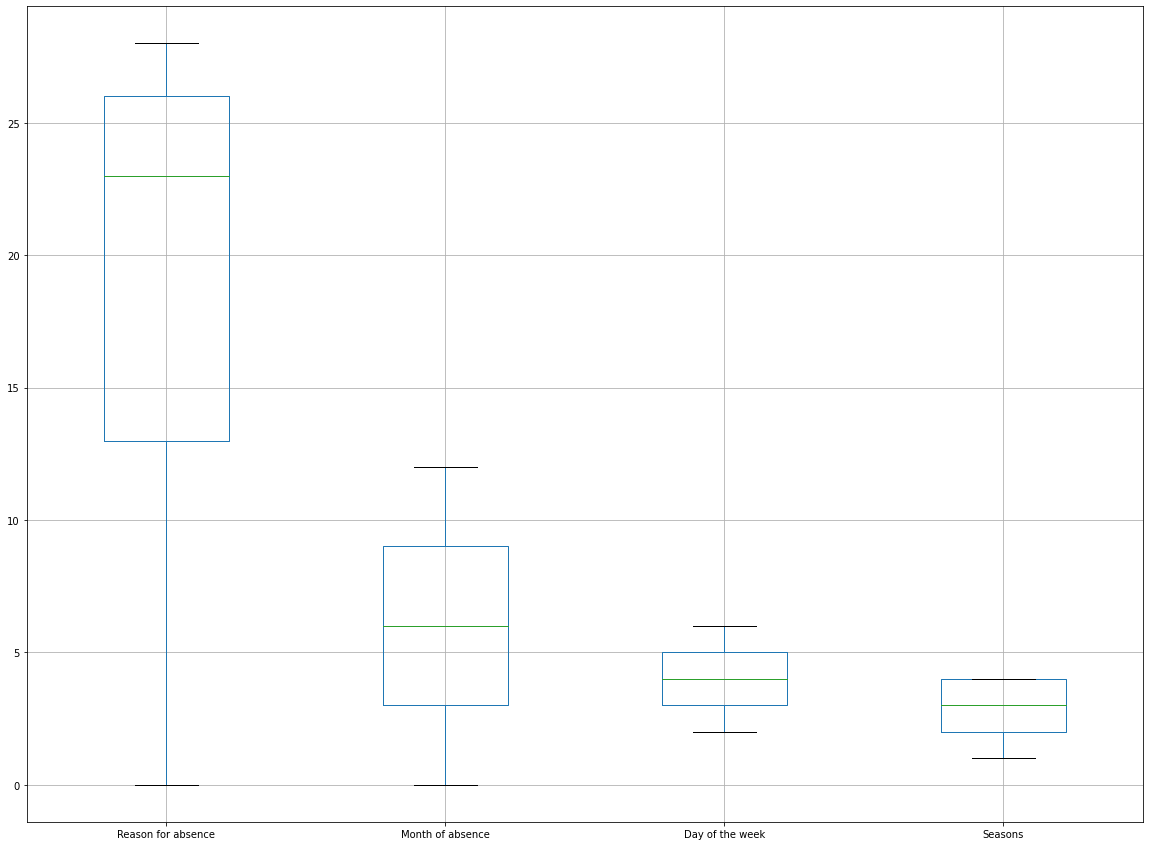

In [574]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
boxplot = df.boxplot(column=['Reason for absence','Month of absence','Day of the week','Seasons'])  

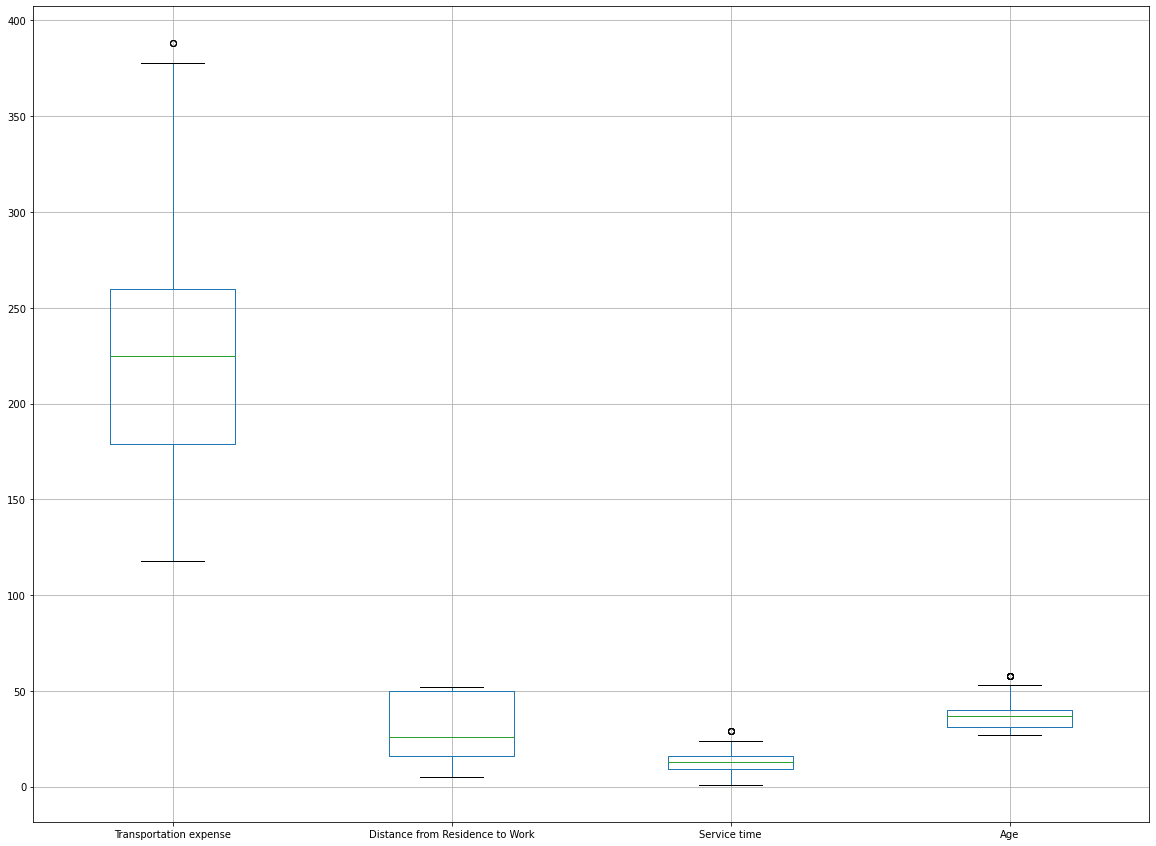

In [575]:
boxplot = df.boxplot(column=['Transportation expense','Distance from Residence to Work','Service time','Age'])  

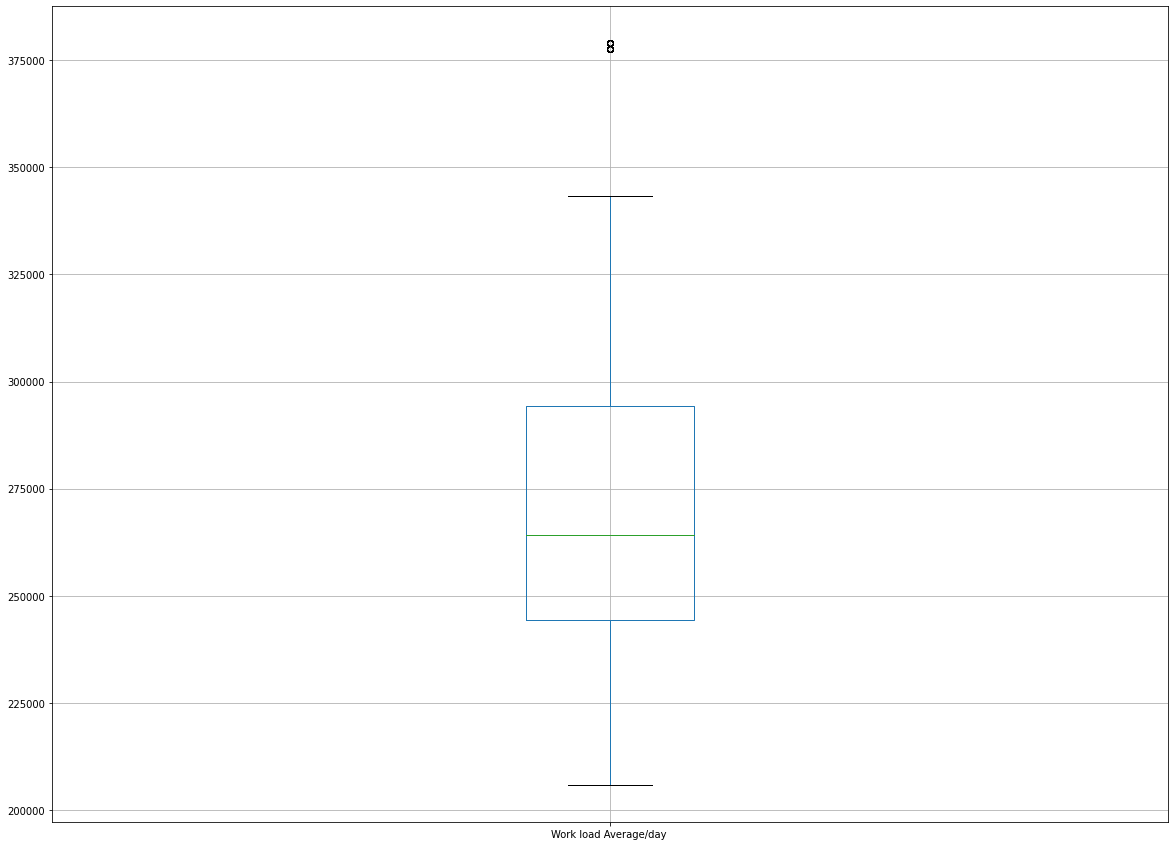

In [576]:
boxplot = df.boxplot(column=['Work load Average/day '])

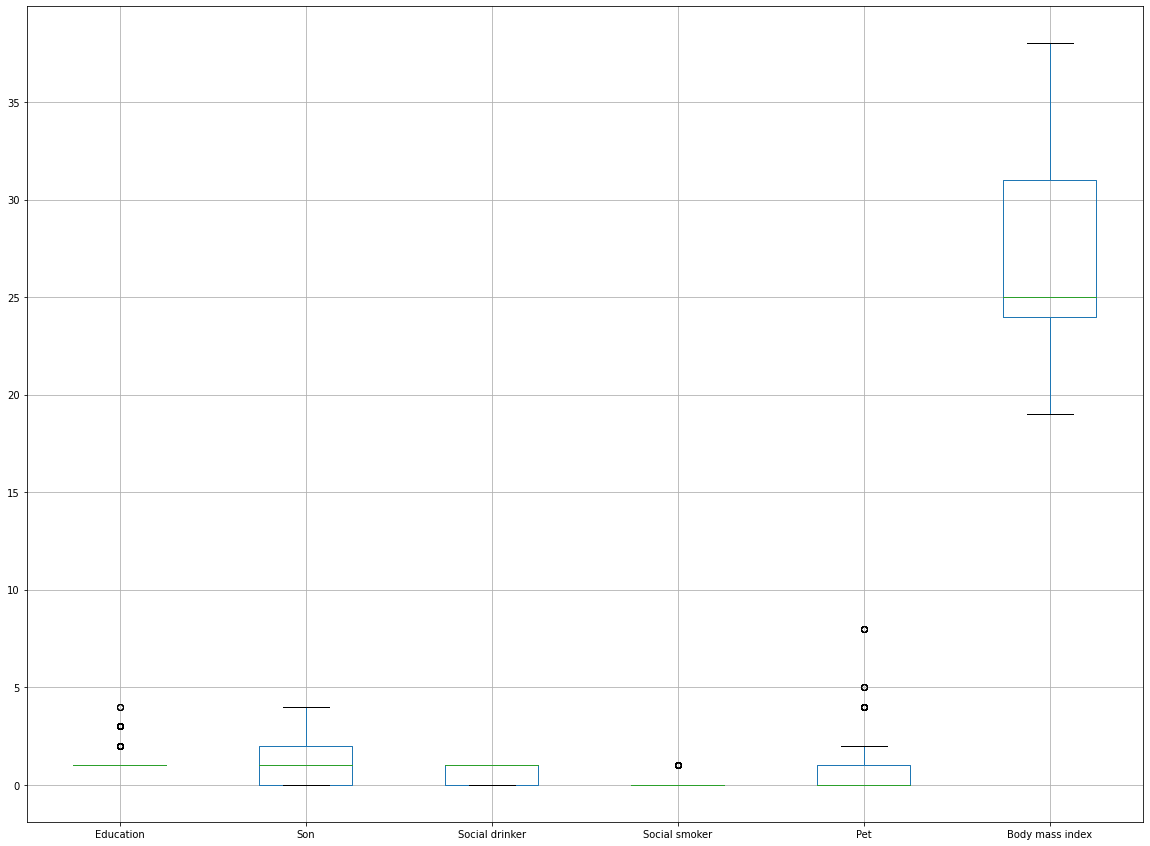

In [577]:
boxplot = df.boxplot(column=['Education',	'Son',	'Social drinker',	'Social smoker',	'Pet',	'Body mass index'])

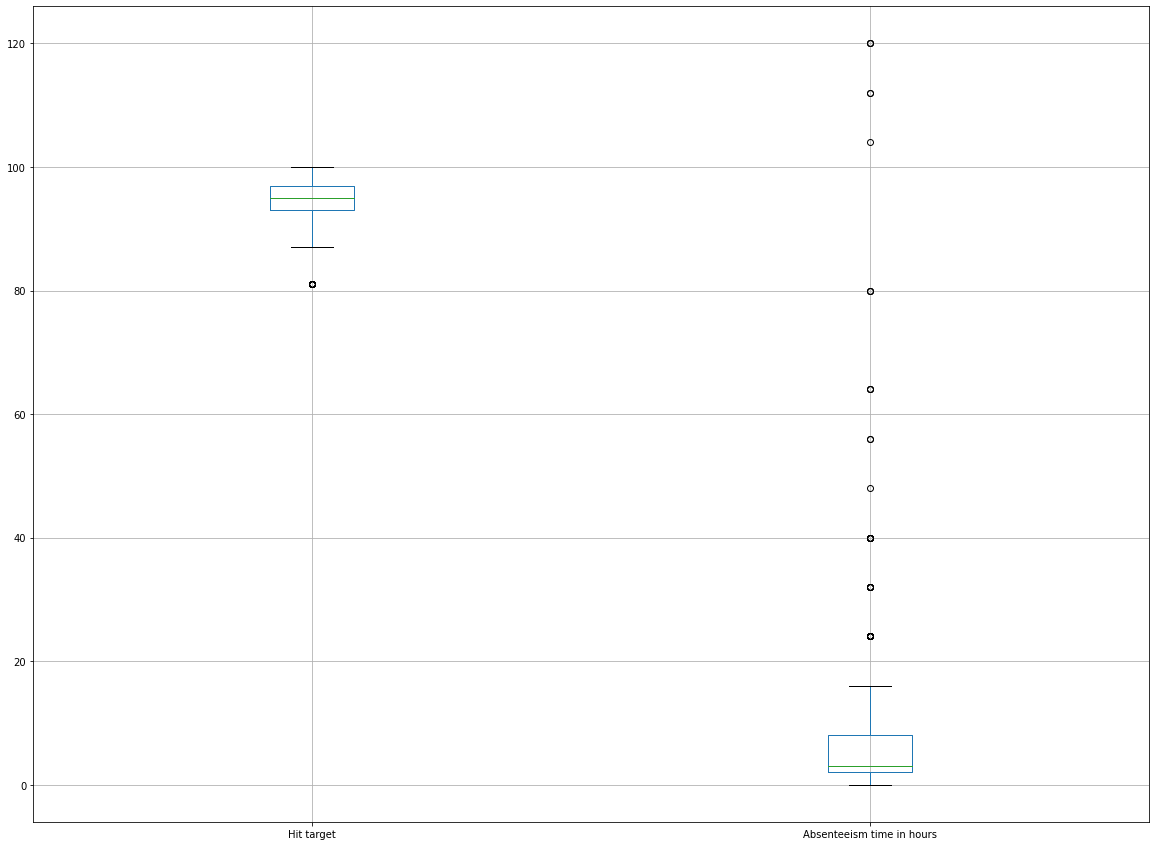

In [578]:
boxplot = df.boxplot(column=['Hit target','Absenteeism time in hours'])

In [579]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 739
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Reason for absence               442 non-null    int64
 1   Month of absence                 442 non-null    int64
 2   Day of the week                  442 non-null    int64
 3   Seasons                          442 non-null    int64
 4   Transportation expense           442 non-null    int64
 5   Distance from Residence to Work  442 non-null    int64
 6   Service time                     442 non-null    int64
 7   Age                              442 non-null    int64
 8   Work load Average/day            442 non-null    int64
 9   Hit target                       442 non-null    int64
 10  Disciplinary failure             442 non-null    int64
 11  Education                        442 non-null    int64
 12  Son                              442 non-null    i

In [582]:
x = df.iloc[:,0:17] 
x

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,30
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,31
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,30
5,23,7,6,1,179,51,18,38,239554,97,0,1,0,1,0,0,31
7,23,7,6,1,260,50,11,36,239554,97,0,1,4,1,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,23,7,4,1,118,10,10,37,264604,93,0,1,0,0,0,0,28
733,22,7,4,1,225,26,9,28,264604,93,0,1,1,0,0,2,24
735,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,30
738,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,35


In [583]:
y = df.iloc[:,17:18] 
y

,Absenteeism time in hours
0,4
2,2
4,2
5,2
7,4
...,...
731,2
733,8
735,8
738,0


In [584]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)


(353, 17)

In [585]:
#  using sklearn library for normalization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [586]:
from sklearn.neighbors import KNeighborsRegressor
dt = KNeighborsRegressor()
rfr = dt.fit(x_train,y_train)

In [587]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from numpy import mean
from numpy import std
from numpy import absolute

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(dt, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAE: %.3f ' % (mean(scores)))

Mean MAE: 1.977 


In [588]:
pred = rfr.predict(x_test)


In [589]:
y_test=y_test.to_numpy()


In [590]:
# calculating mean absolute error
def metrics(predictions, y_test):
    MAE = np.mean(np.abs(predictions-y_test))
    return MAE

In [591]:
mae = metrics(pred, y_test)
print('MAE: %.3f ' % mae)

MAE: 2.189 


In [592]:
predicts = pred
predicts = np.asarray(predicts).reshape(-1)

tests = y_test
tests = np.asarray(tests).reshape(-1)

Text(0.5, 1.0, 'Test vs Predict graph')

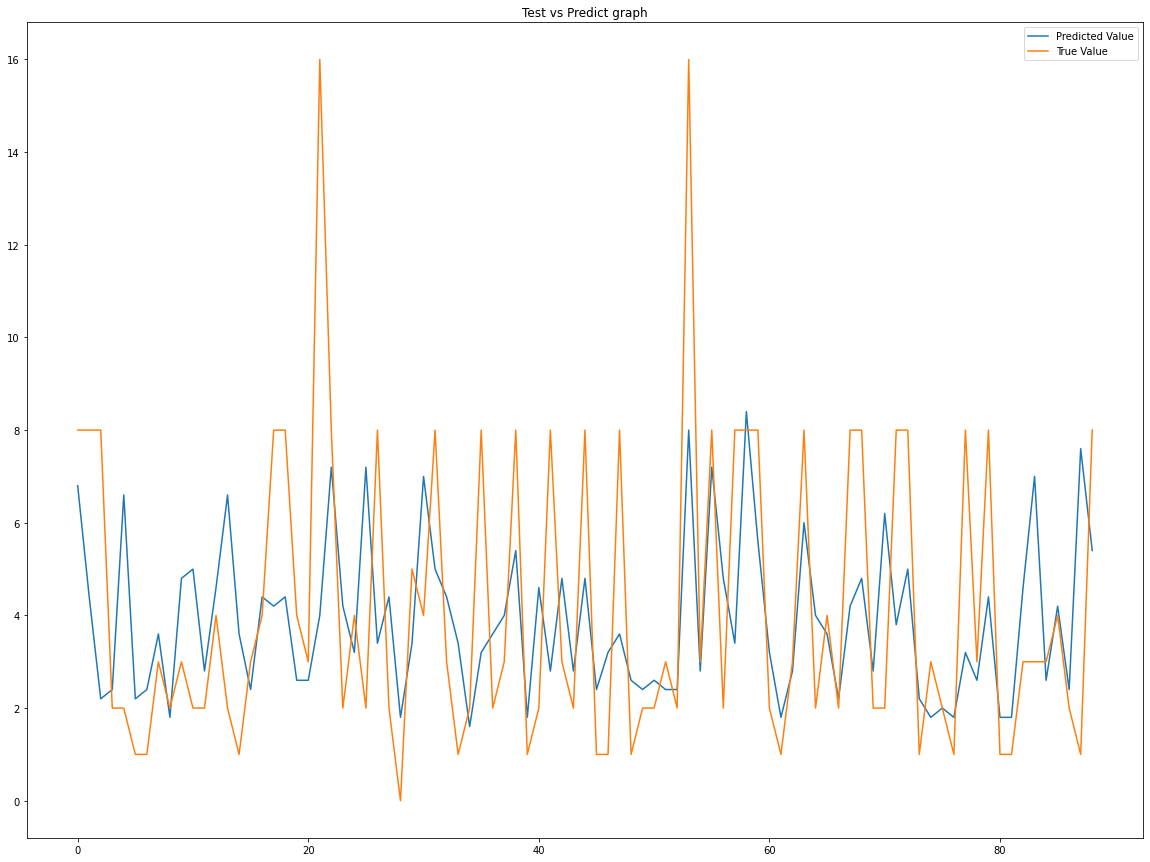

In [593]:
plt.plot(predicts, label='Predicted Value') #plot the loss
plt.plot(tests, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Test vs Predict graph')